## Waste Management using CNN Model

In [12]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# pip install tensorflow


In [15]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import warnings 
warnings.filterwarnings('ignore') 

In [16]:
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

In [21]:
# Importing libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob 

In [25]:
# Visualization 
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})      

100%|██████████| 9999/9999 [00:29<00:00, 342.24it/s] 


In [26]:
data.shape

(22564, 2)

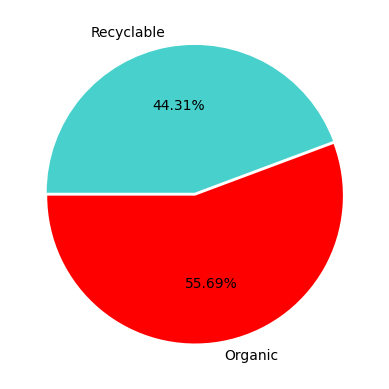

In [39]:
colors = ['#FF0000','#48D1CC']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%', colors = colors, startangle = 180, explode=[0.01,0.01])
plt.show()